In [159]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [5]:
def hypo(theta, x):
    return x*theta[1] + theta[0]

## Manually generating data

In [23]:
count = 100

X = np.linspace(0, 100, count)
error = np.random.randint(-10, 10, count)

In [24]:
theta = np.array([1,1])

Y = hypo(theta, X) + error

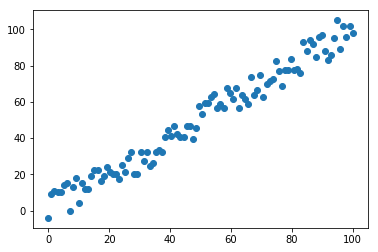

In [25]:
plt.scatter(X, Y)

## Using scikit for generating data

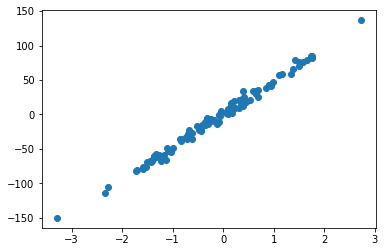

In [134]:
X, Y = make_regression(n_samples=100, n_features=1, noise=5)
plt.scatter(X, Y)
# print(Y.shape)


In [135]:
def hypo(theta, x):
    return x*theta[1] + theta[0]

def error(X, Y, theta):
    Yh = hypo(theta, X)
    return np.sum((Y-Yh)**2)

In [136]:


# print(error(X, Y, theta))

In [150]:
def grad_decent(X, Y, theta, lr):
    Yh = hypo(theta, X)
    
    Y = Y.reshape(-1, 1)
    
    change_inter = (np.sum((Y - Yh))/X.shape[0]) * lr
    change_slop = (np.sum((Y - Yh) * X)/X.shape[0]) * lr
    
    theta[0] += change_inter
    theta[1] += change_slop
    
    e = error(X, Y, theta)
    
    return theta, e
    

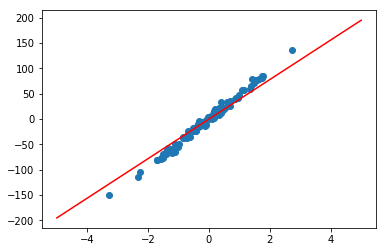

In [151]:
theta = np.array([0, 0])
for i in range(1000):
    theta, e = grad_decent(X, Y, theta, .1)

X_proj = np.linspace(-5, 5, 10)
Y_proj = hypo(theta, X_proj)

plt.scatter(X, Y)
plt.plot(X_proj, Y_proj, c="Red")

In [145]:
data = np.array([2, 5, 6, 9])

print(data * data)

[ 4 25 36 81]


## study of boston housing data

In [166]:
data = load_boston()

model = LinearRegression()

slice = 400

X = data.data
Y = data.target

model.fit(X[:slice], Y[:slice])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
yp = model.predict(X[slice:])

In [170]:
ya = Y[slice:]

In [172]:
np.sum((yp-ya)**2/yp.shape[0])

37.893778599601866

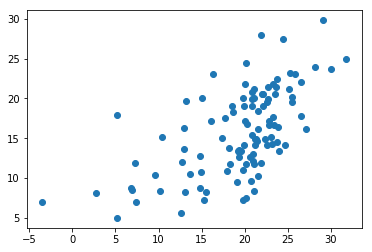

In [182]:
# plt.scatter(np.linspace(0, yp.shape[0], yp.shape[0]), yp)
plt.scatter(yp, ya)